# **Trabajo Práctico BIG DATA**
**Alumna:** Mariana Neumann

**Objetivo:** El objetivo de este trabajo práctico es utilizar técnicas de web scraping para obtener comentarios de películas de un sitio web, realizar el procesamiento de texto y analizar el sentimiento de los comentarios utilizando técnicas de análisis de texto. Además, se requiere la visualización de los resultados mediante gráficos para obtener una representación clara de los
datos.

# 1. Web Scraping


El sitio web seleccionado se llama IMDb, la cual es una base de datos en línea de información relacionada con películas, series de televisión, podcasts, videos caseros, videojuegos y transmisión de contenido en línea, incluido el elenco, el equipo de producción y biografías personales, resúmenes de tramas, curiosidades, calificaciones y reseñas críticas y de fanáticos.

**Peliculas a analizar**
- **Coco:** "Coco" es una película de animación producida por Pixar Animation Studios y lanzada en 2017. La historia se desarrolla en México y está inspirada en la tradición del Día de los Muertos.
- **Cada día:** Cada día es una pelicula basada un libro muy famoso. Se trata de la vida de una persona que se despierta en un cuerpo diferente todos los dias y todas las dificultades y batallas personales con las cuales se enfrenta todos los días.



In [79]:
#importamos las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [80]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

In [81]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Función para realizar web scraping de una película en IMDb y guardar los datos en un DataFrame
def scrape_movie_reviews(url, max_pages):
    # Listas para almacenar los datos
    titles = []
    ratings = []
    contents = []
    fechas = []

    # Iterar sobre las páginas de reseñas
    for page in range(1, max_pages + 1):
        # URL de la página actual
        page_url = f"{url}?start={((page - 1) * 10)}"

        # Realizar la solicitud HTTP
        response = requests.get(page_url)

        # Crear el objeto BeautifulSoup
        soup = BeautifulSoup(response.content, "html.parser")

        # Encontrar todas las opiniones y reseñas
        reviews = soup.find_all("div", class_="lister-item-content")

        # Iterar sobre las reseñas y extraer los detalles deseados
        for review in reviews:
            # Título de la reseña
            title = review.find("a", class_="title").text
            titles.append(title)

            # Puntuación de la reseña
            rating = review.find("span", class_="rating-other-user-rating").find("span").text
            ratings.append(rating)

            # Contenido de la reseña
            content = review.find("div", class_="text").text.strip()
            contents.append(content)

            # Fecha de la reseña
            fecha = review.find("span", class_="review-date").text  # Ajusta el selector según la estructura HTML de la página
            fechas.append(fecha)


    # Crear el DataFrame
    data = {
        "Titulo": titles,
        "Puntuacion": ratings,
        "Resenha": contents,
        "Fecha": fechas
    }

    df = pd.DataFrame(data)
    return df

# URL de la página de "Coco" en IMDb
coco_url = "https://www.imdb.com/title/tt2380307/reviews/?ref_=tt_ov_rt"

# Realizar web scraping de la película "Coco"
df_coco = scrape_movie_reviews(coco_url, max_pages=10)

# URL de la página de "Cada Día" en IMDb
cada_dia_url = "https://www.imdb.com/title/tt7026672/reviews/?ref_=tt_ov_rt"

# Realizar web scraping de la película "Cada Día"
df_cadaDia = scrape_movie_reviews(cada_dia_url, max_pages=10)

# Imprimir los primeros registros de los DataFrames
print("DataFrame de Coco:")
print(df_coco.head())
print()

print("DataFrame de Cada Día:")
print(df_cadaDia.head())

DataFrame de Coco:
                                              Titulo Puntuacion  \
0                           Succeeds on all levels\n         10   
1                             What's not to like?!\n         10   
2                                         Shocked!\n         10   
3   Coco is the number one Pixar cartoon I've see...         10   
4                     I cried twice watching this.\n         10   

                                             Resenha            Fecha  
0  Music is banned in Miguel's household after hi...       1 May 2018  
1  I am very glad I saw "Coco" and understand exa...  31 October 2018  
2  I knew absolutely nothing about this movie wal...  1 December 2017  
3  There are no shortcomings in the picture, conn...     18 July 2020  
4  I have always been a fan of Pixar. They are re...  2 December 2017  

DataFrame de Cada Día:
                                              Titulo Puntuacion  \
0    I was skeptical , really, really skeptical...\n   

In [82]:
df_coco.shape

(250, 4)

In [83]:
df_cadaDia.head()

,Titulo,Puntuacion,Resenha,Fecha
0,"I was skeptical , really, really skeptical...\n",8,"When I read the premise, I felt it was a rip o...",10 June 2018
1,"New day, different/same .... well you know wh...",5,"So this is a very high end concept, a good ide...",18 October 2018
2,Its interesting premise and the deft handling...,6,You just have to accept its science-fiction or...,22 April 2018
3,DAILY SCRUB\n,7,"Forget polygamy, hows about dating someone new...",5 March 2018
4,Weird premise but I felt intrigued by it\n,5,Everyday is a teen romantic fantasy about a yo...,2 January 2019


In [84]:
df_cadaDia.shape

(250, 4)

# 2. Procesamiento de Texto

In [85]:
#LIMPIERA DE CARACTERES ESPECIALES
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
df_coco['Titulo Resenha'] = df_coco['Titulo'].apply(clean)
df_coco['Resenha_limpia'] = df_coco['Resenha'].apply(clean)
df_cadaDia['Titulo Resenha'] = df_cadaDia['Titulo'].apply(clean)
df_cadaDia['Resenha_limpia'] = df_cadaDia['Resenha'].apply(clean)
df_coco.head()

,Titulo,Puntuacion,Resenha,Fecha,Titulo Resenha,Resenha_limpia
0,Succeeds on all levels\n,10,Music is banned in Miguel's household after hi...,1 May 2018,Succeeds on all levels,Music is banned in Miguel s household after hi...
1,What's not to like?!\n,10,"I am very glad I saw ""Coco"" and understand exa...",31 October 2018,What s not to like,I am very glad I saw Coco and understand exact...
2,Shocked!\n,10,I knew absolutely nothing about this movie wal...,1 December 2017,Shocked,I knew absolutely nothing about this movie wal...
3,Coco is the number one Pixar cartoon I've see...,10,"There are no shortcomings in the picture, conn...",18 July 2020,Coco is the number one Pixar cartoon I ve see...,There are no shortcomings in the picture conno...
4,I cried twice watching this.\n,10,I have always been a fan of Pixar. They are re...,2 December 2017,I cried twice watching this,I have always been a fan of Pixar They are rea...


In [86]:
df_cadaDia.head()

,Titulo,Puntuacion,Resenha,Fecha,Titulo Resenha,Resenha_limpia
0,"I was skeptical , really, really skeptical...\n",8,"When I read the premise, I felt it was a rip o...",10 June 2018,I was skeptical really really skeptical,When I read the premise I felt it was a rip on...
1,"New day, different/same .... well you know wh...",5,"So this is a very high end concept, a good ide...",18 October 2018,New day different same well you know what,So this is a very high end concept a good idea...
2,Its interesting premise and the deft handling...,6,You just have to accept its science-fiction or...,22 April 2018,Its interesting premise and the deft handling...,You just have to accept its science fiction or...
3,DAILY SCRUB\n,7,"Forget polygamy, hows about dating someone new...",5 March 2018,DAILY SCRUB,Forget polygamy hows about dating someone new ...
4,Weird premise but I felt intrigued by it\n,5,Everyday is a teen romantic fantasy about a yo...,2 January 2019,Weird premise but I felt intrigued by it,Everyday is a teen romantic fantasy about a yo...


In [87]:
df_coco = df_coco.drop('Titulo', axis=1)

In [88]:
df_coco = df_coco.drop('Resenha', axis=1)

In [89]:
df_cadaDia = df_cadaDia.drop('Titulo', axis=1)

In [90]:
df_cadaDia = df_cadaDia.drop('Resenha', axis=1)

In [91]:
df_coco .head(10)

,Puntuacion,Fecha,Titulo Resenha,Resenha_limpia
0,10,1 May 2018,Succeeds on all levels,Music is banned in Miguel s household after hi...
1,10,31 October 2018,What s not to like,I am very glad I saw Coco and understand exact...
2,10,1 December 2017,Shocked,I knew absolutely nothing about this movie wal...
3,10,18 July 2020,Coco is the number one Pixar cartoon I ve see...,There are no shortcomings in the picture conno...
4,10,2 December 2017,I cried twice watching this,I have always been a fan of Pixar They are rea...
5,10,28 October 2017,Stunning beautiful colorful powerful sad happ...,I may be biased since this movie portrayed per...
6,8,10 January 2018,A Charming Depiction of a Beautiful Spanish L...,Coco tells the story of young boy named Miguel...
7,10,28 November 2021,The magic of Mexico,Coco is the best animated film from Pixar and...
8,10,28 December 2019,Another great film from Pixar,This Pixar animation is centred on Miguel a Me...
9,10,13 April 2018,Music s the only thing that makes me happy,I m not an animated movie fan per se so this o...


In [92]:
df_cadaDia.head()

,Puntuacion,Fecha,Titulo Resenha,Resenha_limpia
0,8,10 June 2018,I was skeptical really really skeptical,When I read the premise I felt it was a rip on...
1,5,18 October 2018,New day different same well you know what,So this is a very high end concept a good idea...
2,6,22 April 2018,Its interesting premise and the deft handling...,You just have to accept its science fiction or...
3,7,5 March 2018,DAILY SCRUB,Forget polygamy hows about dating someone new ...
4,5,2 January 2019,Weird premise but I felt intrigued by it,Everyday is a teen romantic fantasy about a yo...


**TOKENIZACION**

In [93]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df_coco['POS tagged Titulo'] = df_coco ['Titulo Resenha'].apply(token_stop_pos)
df_coco['POS tagged Resenha'] = df_coco ['Resenha_limpia'].apply(token_stop_pos)
df_cadaDia['POS tagged Titulo'] = df_cadaDia ['Titulo Resenha'].apply(token_stop_pos)
df_cadaDia['POS tagged Resenha'] = df_cadaDia ['Resenha_limpia'].apply(token_stop_pos)
df_coco.head()
# mydata['POS tagged'][0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Puntuacion,Fecha,Titulo Resenha,Resenha_limpia,POS tagged Titulo,POS tagged Resenha
0,10,1 May 2018,Succeeds on all levels,Music is banned in Miguel s household after hi...,"[(Succeeds, n), (levels, n)]","[(Music, n), (banned, v), (Miguel, n), (househ..."
1,10,31 October 2018,What s not to like,I am very glad I saw Coco and understand exact...,"[(like, v)]","[(glad, a), (saw, v), (Coco, n), (understand, ..."
2,10,1 December 2017,Shocked,I knew absolutely nothing about this movie wal...,"[(Shocked, v)]","[(knew, v), (absolutely, r), (nothing, n), (mo..."
3,10,18 July 2020,Coco is the number one Pixar cartoon I ve see...,There are no shortcomings in the picture conno...,"[(Coco, n), (number, n), (one, None), (Pixar, ...","[(shortcomings, n), (picture, n), (connotation..."
4,10,2 December 2017,I cried twice watching this,I have always been a fan of Pixar They are rea...,"[(cried, v), (twice, r), (watching, v)]","[(always, r), (fan, n), (Pixar, n), (really, r..."


In [94]:
df_cadaDia.head()

,Puntuacion,Fecha,Titulo Resenha,Resenha_limpia,POS tagged Titulo,POS tagged Resenha
0,8,10 June 2018,I was skeptical really really skeptical,When I read the premise I felt it was a rip on...,"[(skeptical, a), (really, r), (really, r), (sk...","[(read, v), (premise, n), (felt, v), (rip, n),..."
1,5,18 October 2018,New day different same well you know what,So this is a very high end concept a good idea...,"[(New, n), (day, n), (different, a), (well, r)...","[(high, a), (end, n), (concept, v), (good, a),..."
2,6,22 April 2018,Its interesting premise and the deft handling...,You just have to accept its science fiction or...,"[(interesting, a), (premise, n), (deft, n), (h...","[(accept, v), (science, n), (fiction, n), (fan..."
3,7,5 March 2018,DAILY SCRUB,Forget polygamy hows about dating someone new ...,"[(DAILY, a), (SCRUB, n)]","[(Forget, n), (polygamy, n), (hows, v), (datin..."
4,5,2 January 2019,Weird premise but I felt intrigued by it,Everyday is a teen romantic fantasy about a yo...,"[(Weird, a), (premise, n), (felt, v), (intrigu...","[(Everyday, n), (teen, a), (romantic, a), (fan..."


**LEMMATIZACION**

In [95]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df_coco['Lemma Titulo'] = df_coco['POS tagged Titulo'].apply(lemmatize)
df_coco['Lemma Resenha'] = df_coco['POS tagged Resenha'].apply(lemmatize)
df_cadaDia['Lemma Titulo'] = df_cadaDia['POS tagged Titulo'].apply(lemmatize)
df_cadaDia['Lemma Resenha'] = df_cadaDia['POS tagged Resenha'].apply(lemmatize)
df_coco.head()
# print(mydata['review'][239] + "\n" + mydata['Lemma'][239])

,Puntuacion,Fecha,Titulo Resenha,Resenha_limpia,POS tagged Titulo,POS tagged Resenha,Lemma Titulo,Lemma Resenha
0,10,1 May 2018,Succeeds on all levels,Music is banned in Miguel s household after hi...,"[(Succeeds, n), (levels, n)]","[(Music, n), (banned, v), (Miguel, n), (househ...",Succeeds level,Music ban Miguel household musical great gra...
1,10,31 October 2018,What s not to like,I am very glad I saw Coco and understand exact...,"[(like, v)]","[(glad, a), (saw, v), (Coco, n), (understand, ...",like,glad saw Coco understand exactly Oscar Best ...
2,10,1 December 2017,Shocked,I knew absolutely nothing about this movie wal...,"[(Shocked, v)]","[(knew, v), (absolutely, r), (nothing, n), (mo...",Shocked,know absolutely nothing movie walking reason...
3,10,18 July 2020,Coco is the number one Pixar cartoon I ve see...,There are no shortcomings in the picture conno...,"[(Coco, n), (number, n), (one, None), (Pixar, ...","[(shortcomings, n), (picture, n), (connotation...",Coco number one Pixar cartoon see far,shortcoming picture connotation plot animati...
4,10,2 December 2017,I cried twice watching this,I have always been a fan of Pixar They are rea...,"[(cried, v), (twice, r), (watching, v)]","[(always, r), (fan, n), (Pixar, n), (really, r...",cry twice watch,always fan Pixar really good guy set bar qua...


In [96]:
df_cadaDia.head()

,Puntuacion,Fecha,Titulo Resenha,Resenha_limpia,POS tagged Titulo,POS tagged Resenha,Lemma Titulo,Lemma Resenha
0,8,10 June 2018,I was skeptical really really skeptical,When I read the premise I felt it was a rip on...,"[(skeptical, a), (really, r), (really, r), (sk...","[(read, v), (premise, n), (felt, v), (rip, n),...",skeptical really really skeptical,read premise felt rip YouTube series without...
1,5,18 October 2018,New day different same well you know what,So this is a very high end concept a good idea...,"[(New, n), (day, n), (different, a), (well, r)...","[(high, a), (end, n), (concept, v), (good, a),...",New day different well know,high end concept good idea might also make g...
2,6,22 April 2018,Its interesting premise and the deft handling...,You just have to accept its science fiction or...,"[(interesting, a), (premise, n), (deft, n), (h...","[(accept, v), (science, n), (fiction, n), (fan...",interesting premise deft handling set apart ...,accept science fiction fantasy central conce...
3,7,5 March 2018,DAILY SCRUB,Forget polygamy hows about dating someone new ...,"[(DAILY, a), (SCRUB, n)]","[(Forget, n), (polygamy, n), (hows, v), (datin...",DAILY SCRUB,Forget polygamy hows date someone new every ...
4,5,2 January 2019,Weird premise but I felt intrigued by it,Everyday is a teen romantic fantasy about a yo...,"[(Weird, a), (premise, n), (felt, v), (intrigu...","[(Everyday, n), (teen, a), (romantic, a), (fan...",Weird premise felt intrigue,Everyday teen romantic fantasy young girl na...


In [97]:
df_coco[['POS tagged Titulo',	'POS tagged Resenha',	'Lemma Titulo',	'Lemma Resenha']]

,POS tagged Titulo,POS tagged Resenha,Lemma Titulo,Lemma Resenha
0,"[(Succeeds, n), (levels, n)]","[(Music, n), (banned, v), (Miguel, n), (househ...",Succeeds level,Music ban Miguel household musical great gra...
1,"[(like, v)]","[(glad, a), (saw, v), (Coco, n), (understand, ...",like,glad saw Coco understand exactly Oscar Best ...
2,"[(Shocked, v)]","[(knew, v), (absolutely, r), (nothing, n), (mo...",Shocked,know absolutely nothing movie walking reason...
3,"[(Coco, n), (number, n), (one, None), (Pixar, ...","[(shortcomings, n), (picture, n), (connotation...",Coco number one Pixar cartoon see far,shortcoming picture connotation plot animati...
4,"[(cried, v), (twice, r), (watching, v)]","[(always, r), (fan, n), (Pixar, n), (really, r...",cry twice watch,always fan Pixar really good guy set bar qua...
...,...,...,...,...
245,"[(beautiful, a), (movie, n)]","[(trying, v), (get, v), (kids, n), (watch, v),...",beautiful movie,try get kid watch year never interested Fina...
246,"[(really, r), (good, a), (say, v)]","[(Coco, n), (special, a), (Pixar, n), (film, n...",really good say,Coco special Pixar film special film general...
247,"[(Love, v)]","[(Mexican, n), (born, None), (child, n), (crie...",Love,Mexican born child cry saw movie son America...
248,"[(Respectul, n), (Tribute, n), (Mexican, n), (...","[(family, n), (waiting, v), (movie, n), (year,...",Respectul Tribute Mexican Culture People,family wait movie year since see teaser blow...


# 3. Análisis de Sentimiento


In [98]:
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [99]:
data_coco = pd.DataFrame(df_coco[['Titulo Resenha', 'Lemma Titulo', 'Resenha_limpia', 'Lemma Resenha']])

In [100]:
data_cadaDia = pd.DataFrame(df_cadaDia[['Titulo Resenha', 'Lemma Titulo', 'Resenha_limpia', 'Lemma Resenha']])

In [101]:
data_coco['Polarity Titulo'] = data_coco['Lemma Titulo'].apply(getPolarity)
data_coco['Polarity Resenha'] = data_coco['Lemma Resenha'].apply(getPolarity)
data_coco['Analysis Titulo'] = data_coco['Polarity Titulo'].apply(analysis)
data_coco['Analysis Resenha'] = data_coco['Polarity Resenha'].apply(analysis)

data_coco.head()

,Titulo Resenha,Lemma Titulo,Resenha_limpia,Lemma Resenha,Polarity Titulo,Polarity Resenha,Analysis Titulo,Analysis Resenha
0,Succeeds on all levels,Succeeds level,Music is banned in Miguel s household after hi...,Music ban Miguel household musical great gra...,0.7,0.201042,Positive,Positive
1,What s not to like,like,I am very glad I saw Coco and understand exact...,glad saw Coco understand exactly Oscar Best ...,0.0,0.212019,Neutral,Positive
2,Shocked,Shocked,I knew absolutely nothing about this movie wal...,know absolutely nothing movie walking reason...,-0.7,0.335124,Negative,Positive
3,Coco is the number one Pixar cartoon I ve see...,Coco number one Pixar cartoon see far,There are no shortcomings in the picture conno...,shortcoming picture connotation plot animati...,0.1,-0.100000,Positive,Negative
4,I cried twice watching this,cry twice watch,I have always been a fan of Pixar They are rea...,always fan Pixar really good guy set bar qua...,0.0,0.367111,Neutral,Positive


In [102]:
data_cadaDia['Polarity Titulo'] = data_cadaDia['Lemma Titulo'].apply(getPolarity)
data_cadaDia['Polarity Resenha'] = data_cadaDia['Lemma Resenha'].apply(getPolarity)
data_cadaDia['Analysis Titulo'] = data_cadaDia['Polarity Titulo'].apply(analysis)
data_cadaDia['Analysis Resenha'] = data_cadaDia['Polarity Resenha'].apply(analysis)

data_cadaDia.head()

,Titulo Resenha,Lemma Titulo,Resenha_limpia,Lemma Resenha,Polarity Titulo,Polarity Resenha,Analysis Titulo,Analysis Resenha
0,I was skeptical really really skeptical,skeptical really really skeptical,When I read the premise I felt it was a rip on...,read premise felt rip YouTube series without...,-0.500000,0.250000,Negative,Positive
1,New day different same well you know what,New day different well know,So this is a very high end concept a good idea...,high end concept good idea might also make g...,0.068182,0.146360,Positive,Positive
2,Its interesting premise and the deft handling...,interesting premise deft handling set apart ...,You just have to accept its science fiction or...,accept science fiction fantasy central conce...,0.550000,0.194067,Positive,Positive
3,DAILY SCRUB,DAILY SCRUB,Forget polygamy hows about dating someone new ...,Forget polygamy hows date someone new every ...,0.000000,0.099443,Neutral,Positive
4,Weird premise but I felt intrigued by it,Weird premise felt intrigue,Everyday is a teen romantic fantasy about a yo...,Everyday teen romantic fantasy young girl na...,-0.500000,-0.032222,Negative,Negative


In [103]:
#del fin_data

### Analisis de sentimiento con VADER

In [104]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [106]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

data_coco['Vader Sentiment Titulo'] = data_coco['Lemma Titulo'].apply(vadersentimentanalysis)
data_coco['Vader Sentiment Resenha'] = data_coco['Lemma Resenha'].apply(vadersentimentanalysis)
data_cadaDia['Vader Sentiment Titulo'] = data_cadaDia['Lemma Titulo'].apply(vadersentimentanalysis)
data_cadaDia['Vader Sentiment Resenha'] = data_cadaDia['Lemma Resenha'].apply(vadersentimentanalysis)

In [107]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

data_coco['Vader Analysis Titulo'] = data_coco['Vader Sentiment Titulo'].apply(vader_analysis)
data_coco['Vader Analysis Resenha'] = data_coco['Vader Sentiment Resenha'].apply(vader_analysis)
data_cadaDia['Vader Analysis Titulo'] = data_cadaDia['Vader Sentiment Titulo'].apply(vader_analysis)
data_cadaDia['Vader Analysis Resenha'] = data_cadaDia['Vader Sentiment Resenha'].apply(vader_analysis)
data_coco.head()

,Titulo Resenha,Lemma Titulo,Resenha_limpia,Lemma Resenha,Polarity Titulo,Polarity Resenha,Analysis Titulo,Analysis Resenha,Vader Sentiment Titulo,Vader Sentiment Resenha,Vader Analysis Titulo,Vader Analysis Resenha
0,Succeeds on all levels,Succeeds level,Music is banned in Miguel s household after hi...,Music ban Miguel household musical great gra...,0.7,0.201042,Positive,Positive,0.4939,0.5944,Neutral,Positive
1,What s not to like,like,I am very glad I saw Coco and understand exact...,glad saw Coco understand exactly Oscar Best ...,0.0,0.212019,Neutral,Positive,0.3612,0.9455,Neutral,Positive
2,Shocked,Shocked,I knew absolutely nothing about this movie wal...,know absolutely nothing movie walking reason...,-0.7,0.335124,Negative,Positive,-0.3182,0.9601,Neutral,Positive
3,Coco is the number one Pixar cartoon I ve see...,Coco number one Pixar cartoon see far,There are no shortcomings in the picture conno...,shortcoming picture connotation plot animati...,0.1,-0.100000,Positive,Negative,0.0772,-0.7783,Neutral,Negative
4,I cried twice watching this,cry twice watch,I have always been a fan of Pixar They are rea...,always fan Pixar really good guy set bar qua...,0.0,0.367111,Neutral,Positive,-0.4767,0.9986,Neutral,Positive


In [108]:
#data_coco.drop(['Vader Sentiment Titulo',	'Vader Sentiment Reseña',	'Vader Analysis Titulo', 	'Vader Sentiment Resenha',	'Vader Analysis Resenha'], axis=1, inplace=True)

In [109]:
data_cadaDia.head()

,Titulo Resenha,Lemma Titulo,Resenha_limpia,Lemma Resenha,Polarity Titulo,Polarity Resenha,Analysis Titulo,Analysis Resenha,Vader Sentiment Titulo,Vader Sentiment Resenha,Vader Analysis Titulo,Vader Analysis Resenha
0,I was skeptical really really skeptical,skeptical really really skeptical,When I read the premise I felt it was a rip on...,read premise felt rip YouTube series without...,-0.500000,0.250000,Negative,Positive,-0.6335,0.9797,Negative,Positive
1,New day different same well you know what,New day different well know,So this is a very high end concept a good idea...,high end concept good idea might also make g...,0.068182,0.146360,Positive,Positive,0.2732,0.9853,Neutral,Positive
2,Its interesting premise and the deft handling...,interesting premise deft handling set apart ...,You just have to accept its science fiction or...,accept science fiction fantasy central conce...,0.550000,0.194067,Positive,Positive,0.4019,0.9941,Neutral,Positive
3,DAILY SCRUB,DAILY SCRUB,Forget polygamy hows about dating someone new ...,Forget polygamy hows date someone new every ...,0.000000,0.099443,Neutral,Positive,0.0000,0.9509,Neutral,Positive
4,Weird premise but I felt intrigued by it,Weird premise felt intrigue,Everyday is a teen romantic fantasy about a yo...,Everyday teen romantic fantasy young girl na...,-0.500000,-0.032222,Negative,Negative,-0.1779,0.9729,Neutral,Positive


# 4. Visualización de Datos

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

### TEXTBLOB

Conteo de variables en 'Analysis Titulo' de COCO:
Positive    150
Neutral      80
Negative     20
Name: Analysis Titulo, dtype: int64

Conteo de variables en 'Analysis Resenha' de COCO:
Positive    230
Negative     20
Name: Analysis Resenha, dtype: int64



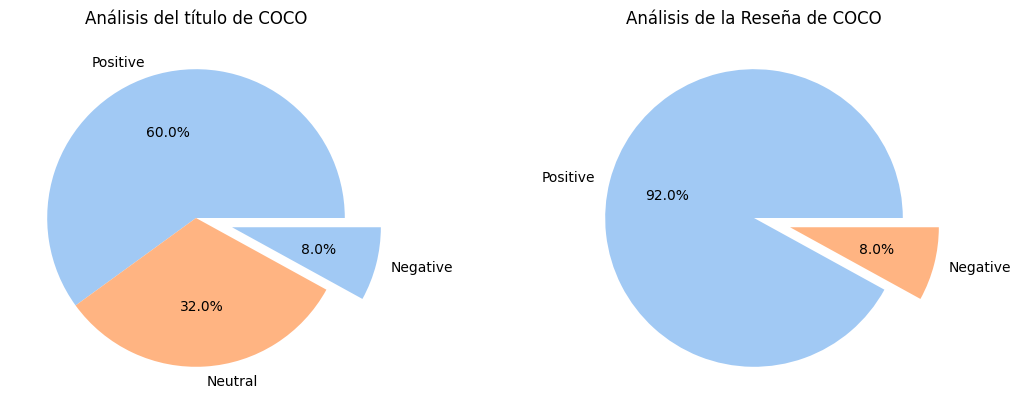

In [111]:
import matplotlib.pyplot as plt

# Gráfico 1: Análisis de polaridad del título
conteo_polaridad_titulo = data_coco['Analysis Titulo'].value_counts()

# Imprimir los conteos de variables en 'Analysis Polaridad Titulo'
print("Conteo de variables en 'Analysis Titulo' de COCO:")
print(conteo_polaridad_titulo)
print()

# Gráfico 2: Análisis de polaridad de la Resenha
conteo_polaridad_resenha = data_coco['Analysis Resenha'].value_counts()

# Imprimir los conteos de variables en 'Analysis Polaridad Resenha'
print("Conteo de variables en 'Analysis Resenha' de COCO:")
print(conteo_polaridad_resenha)
print()

# Crear una figura con dos subtramas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Análisis del título
axes[0].pie(conteo_polaridad_titulo.values, labels=conteo_polaridad_titulo.index, explode=(0, 0, 0.25), autopct='%1.1f%%', shadow=False)
axes[0].set_title("Análisis del título de COCO")  # Agrega el título del gráfico

# Gráfico 2: Análisis de polaridad de la Resenha
axes[1].pie(conteo_polaridad_resenha.values, labels=conteo_polaridad_resenha.index, explode=(0, 0.25), autopct='%1.1f%%', shadow=False)
axes[1].set_title("Análisis de la Reseña de COCO")  # Agrega el título del gráfico


plt.subplots_adjust(wspace=0.5)  # Ajusta el espacio horizontal entre las subtramas

plt.show()

Conteo de variables en 'Analysis Titulo' de CADA DIA:
Positive    120
Neutral      70
Negative     60
Name: Analysis Titulo, dtype: int64

Conteo de variables en 'Analysis Resenha' de CADA DIA:
Positive    240
Negative     10
Name: Analysis Resenha, dtype: int64



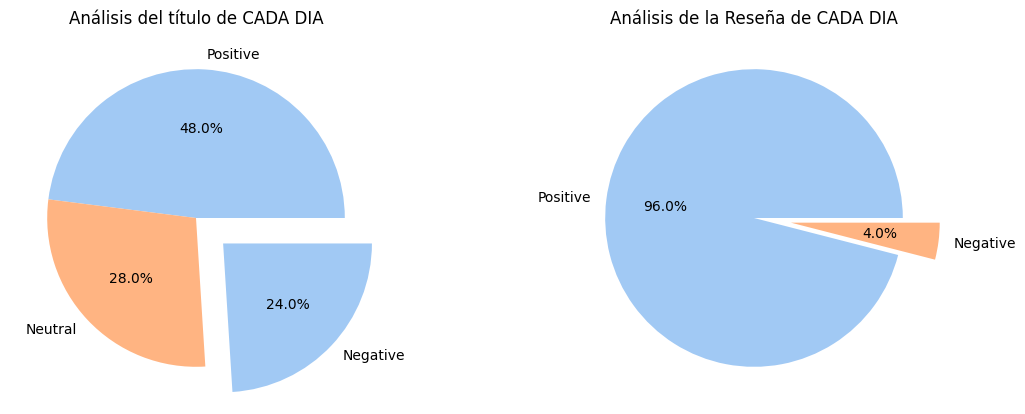

In [112]:
import matplotlib.pyplot as plt

# Gráfico 1: Análisis de polaridad del título
conteo_polaridad_titulo = data_cadaDia['Analysis Titulo'].value_counts()

# Imprimir los conteos de variables en 'Analysis Polaridad Titulo'
print("Conteo de variables en 'Analysis Titulo' de CADA DIA:")
print(conteo_polaridad_titulo)
print()

# Gráfico 2: Análisis de polaridad de la Resenha
conteo_polaridad_resenha = data_cadaDia['Analysis Resenha'].value_counts()

# Imprimir los conteos de variables en 'Analysis Polaridad Resenha'
print("Conteo de variables en 'Analysis Resenha' de CADA DIA:")
print(conteo_polaridad_resenha)
print()

# Crear una figura con dos subtramas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Análisis del título
axes[0].pie(conteo_polaridad_titulo.values, labels=conteo_polaridad_titulo.index, explode=(0, 0, 0.25), autopct='%1.1f%%', shadow=False)
axes[0].set_title("Análisis del título de CADA DIA")  # Agrega el título del gráfico

# Gráfico 2: Análisis de polaridad de la Resenha
axes[1].pie(conteo_polaridad_resenha.values, labels=conteo_polaridad_resenha.index, explode=(0, 0.25), autopct='%1.1f%%', shadow=False)
axes[1].set_title("Análisis de la Reseña de CADA DIA")  # Agrega el título del gráfico


plt.subplots_adjust(wspace=0.5)  # Ajusta el espacio horizontal entre las subtramas

plt.show()

### VADER

In [113]:
vader_counts = data_coco['Vader Analysis Titulo'].value_counts()
vader_counts

Neutral     150
Positive    100
Name: Vader Analysis Titulo, dtype: int64

In [114]:
vader_counts = data_coco['Vader Analysis Resenha'].value_counts()
vader_counts

Positive    220
Negative     30
Name: Vader Analysis Resenha, dtype: int64

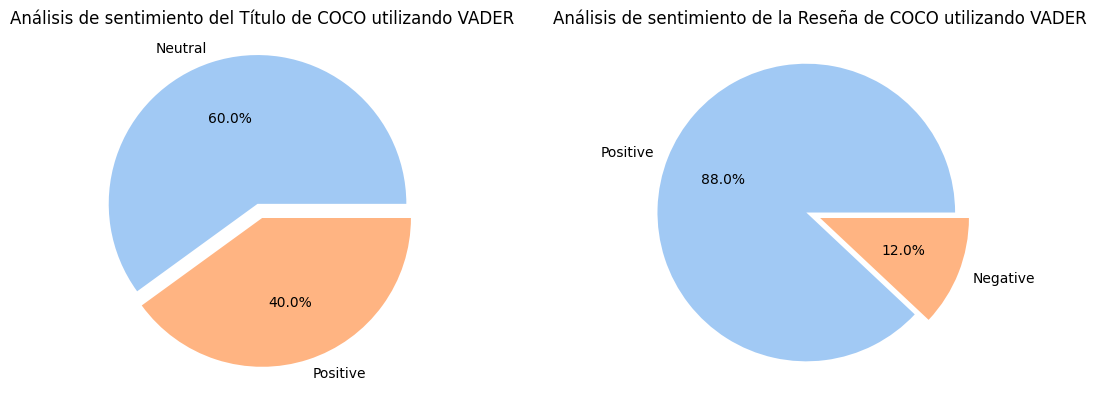

In [115]:
import matplotlib.pyplot as plt

# Código 1
vader_counts_1 = data_coco['Vader Analysis Titulo'].value_counts()
explode_1 = tuple(0.1 if count == vader_counts_1.max() else 0 for count in vader_counts_1.values)

# Crear la primera subtrama
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Análisis de sentimiento del Título utilizando VADER
axes[0].pie(vader_counts_1.values, labels=vader_counts_1.index, explode=explode_1, autopct='%1.1f%%', shadow=False)
axes[0].set_title("Análisis de sentimiento del Título de COCO utilizando VADER")

# Código 2
vader_counts_2 = data_coco['Vader Analysis Resenha'].value_counts()
explode_2 = tuple(0.1 if count == vader_counts_2.max() else 0 for count in vader_counts_2.values)

# Gráfico 2: Análisis de sentimiento de la Reseña utilizando VADER
axes[1].pie(vader_counts_2.values, labels=vader_counts_2.index, explode=explode_2, autopct='%1.1f%%', shadow=False)
axes[1].set_title("Análisis de sentimiento de la Reseña de COCO utilizando VADER")

plt.subplots_adjust(wspace=0.5)  # Ajusta el espacio horizontal entre las subtramas

plt.show()

In [116]:
vader_counts = data_cadaDia['Vader Analysis Titulo'].value_counts()
vader_counts

Neutral     150
Positive     80
Negative     20
Name: Vader Analysis Titulo, dtype: int64

In [117]:
vader_counts = data_cadaDia['Vader Analysis Resenha'].value_counts()
vader_counts

Positive    230
Neutral      20
Name: Vader Analysis Resenha, dtype: int64

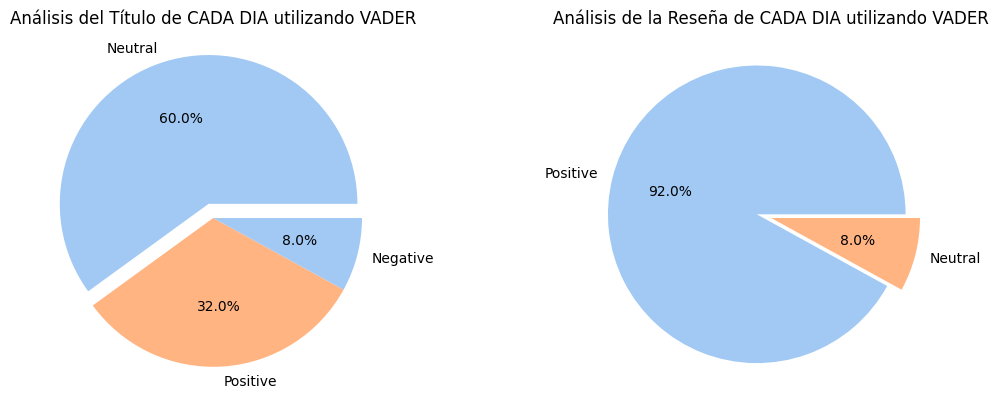

In [118]:
import matplotlib.pyplot as plt

# Código 1
vader_counts_1 = data_cadaDia['Vader Analysis Titulo'].value_counts()
explode_1 = tuple(0.1 if count == vader_counts_1.max() else 0 for count in vader_counts_1.values)

# Crear la primera subtrama
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Análisis de sentimiento del Título utilizando VADER
axes[0].pie(vader_counts_1.values, labels=vader_counts_1.index, explode=explode_1, autopct='%1.1f%%', shadow=False)
axes[0].set_title("Análisis del Título de CADA DIA utilizando VADER")

# Código 2
vader_counts_2 = data_cadaDia['Vader Analysis Resenha'].value_counts()
explode_2 = tuple(0.1 if count == vader_counts_2.max() else 0 for count in vader_counts_2.values)

# Gráfico 2: Análisis de sentimiento de la Reseña utilizando VADER
axes[1].pie(vader_counts_2.values, labels=vader_counts_2.index, explode=explode_2, autopct='%1.1f%%', shadow=False)
axes[1].set_title("Análisis de la Reseña de CADA DIA utilizando VADER")

plt.subplots_adjust(wspace=0.5)  # Ajusta el espacio horizontal entre las subtramas

plt.show()

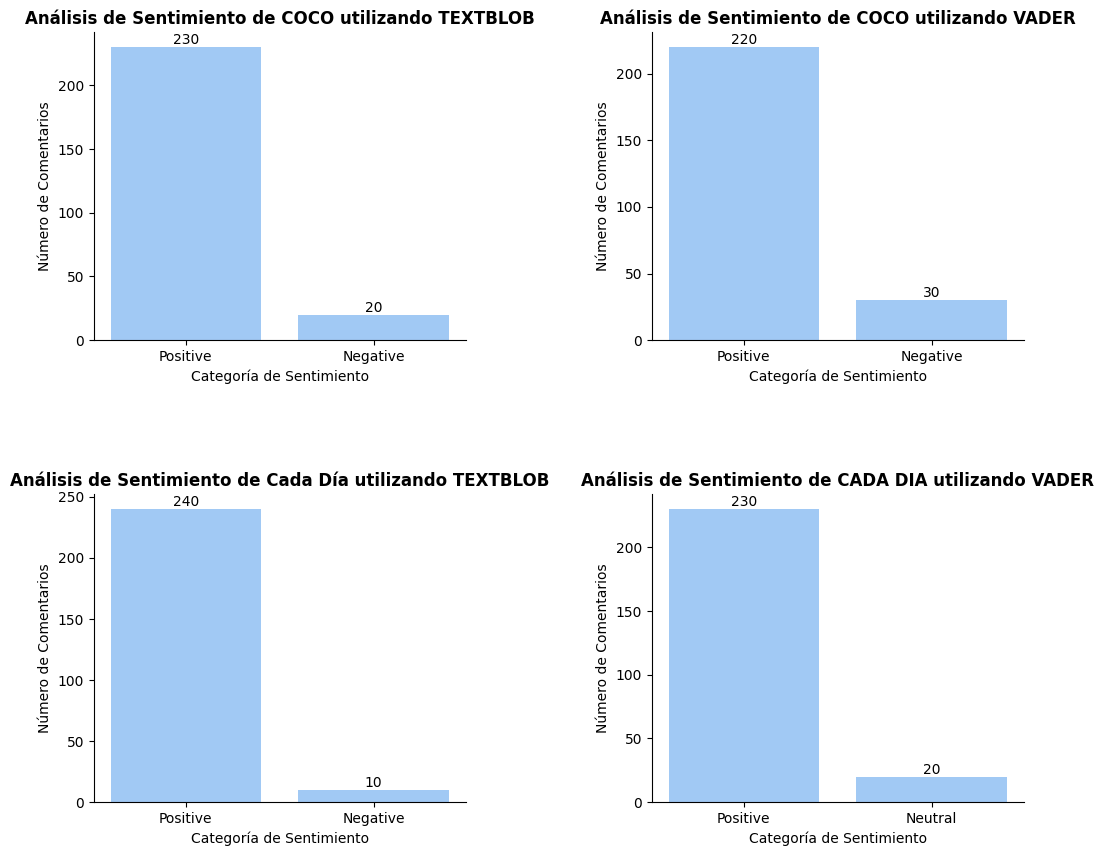

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("pastel", n_colors= 2)
# Obtener el conteo de las categorías de sentimiento de COCO utilizando TEXTBLOB
sentimiento_counts_textblob_coco = data_coco['Analysis Resenha'].value_counts()

# Obtener el conteo de las categorías de sentimiento de COCO utilizando VADER
sentimiento_counts_vader_coco = data_coco['Vader Analysis Resenha'].value_counts()

# Obtener el conteo de las categorías de sentimiento de cada día utilizando TEXTBLOB
sentimiento_counts_textblob_cadaDia = data_cadaDia['Analysis Resenha'].value_counts()

# Obtener el conteo de las categorías de sentimiento de cada día utilizando VADER
sentimiento_counts_vader_cadaDia = data_cadaDia['Vader Analysis Resenha'].value_counts()

# Crear una figura con cuatro subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Colores personalizados para las barras
#colors = ['pastel1', 'Pastel2', 'orange']


# Gráfico 1: Análisis de sentimiento de COCO utilizando TEXTBLOB
axes[0, 0].bar(sentimiento_counts_textblob_coco.index, sentimiento_counts_textblob_coco.values)
for i, count in enumerate(sentimiento_counts_textblob_coco.values):
    axes[0, 0].text(i, count, str(count), ha='center', va='bottom')
axes[0, 0].set_title('Análisis de Sentimiento de COCO utilizando TEXTBLOB', fontweight='bold')
axes[0, 0].set_xlabel('Categoría de Sentimiento')
axes[0, 0].set_ylabel('Número de Comentarios')
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)

# Gráfico 2: Análisis de sentimiento de COCO utilizando VADER
axes[0, 1].bar(sentimiento_counts_vader_coco.index, sentimiento_counts_vader_coco.values)
for i, count in enumerate(sentimiento_counts_vader_coco.values):
    axes[0, 1].text(i, count, str(count), ha='center', va='bottom')
axes[0, 1].set_title('Análisis de Sentimiento de COCO utilizando VADER', fontweight='bold')
axes[0, 1].set_xlabel('Categoría de Sentimiento')
axes[0, 1].set_ylabel('Número de Comentarios')
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)

# Gráfico 3: Análisis de sentimiento de cada día utilizando TEXTBLOB
axes[1, 0].bar(sentimiento_counts_textblob_cadaDia.index, sentimiento_counts_textblob_cadaDia.values)
for i, count in enumerate(sentimiento_counts_textblob_cadaDia.values):
    axes[1, 0].text(i, count, str(count), ha='center', va='bottom')
axes[1, 0].set_title('Análisis de Sentimiento de Cada Día utilizando TEXTBLOB', fontweight='bold')
axes[1, 0].set_xlabel('Categoría de Sentimiento')
axes[1, 0].set_ylabel('Número de Comentarios')
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)

# Gráfico 4: Análisis de sentimiento de cada día utilizando VADER
axes[1, 1].bar(sentimiento_counts_vader_cadaDia.index, sentimiento_counts_vader_cadaDia.values)
for i, count in enumerate(sentimiento_counts_vader_cadaDia.values):
    axes[1, 1].text(i, count, str(count), ha='center', va='bottom')
axes[1, 1].set_title('Análisis de Sentimiento de CADA DIA utilizando VADER', fontweight='bold')
axes[1, 1].set_xlabel('Categoría de Sentimiento')
axes[1, 1].set_ylabel('Número de Comentarios')
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)

# Ajustar el espaciado entre los subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Mostrar los gráficos
plt.show()


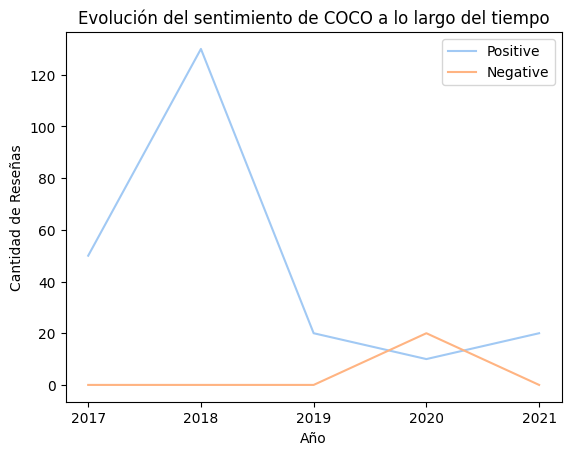

In [120]:
import matplotlib.pyplot as plt
import pandas as pd

# Unir las columnas de fecha y análisis de sentimiento en un nuevo DataFrame
df_resenha = pd.concat([df_coco['Fecha'], data_coco['Analysis Resenha']], axis=1)

# Asegurarse de que la columna de fecha esté en formato de fecha y ordenar el DataFrame por fecha
df_resenha['Fecha'] = pd.to_datetime(df_resenha['Fecha'], format="%d %B %Y")
df_resenha.sort_values('Fecha', inplace=True)

# Agrupar las reseñas por año y contar la cantidad de reseñas positivas y negativas
resenha_counts = df_resenha.groupby(df_resenha['Fecha'].dt.year)['Analysis Resenha'].value_counts().unstack().fillna(0)

# Crear el gráfico de líneas
plt.plot(resenha_counts.index, resenha_counts['Positive'], label='Positive')
plt.plot(resenha_counts.index, resenha_counts['Negative'], label='Negative')

# Agregar título y etiquetas de los ejes
plt.title('Evolución del sentimiento de COCO a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reseñas')
plt.legend()

# Mostrar solo los años enteros en el eje x
plt.xticks(resenha_counts.index.astype(int))

# Mostrar el gráfico
plt.show()

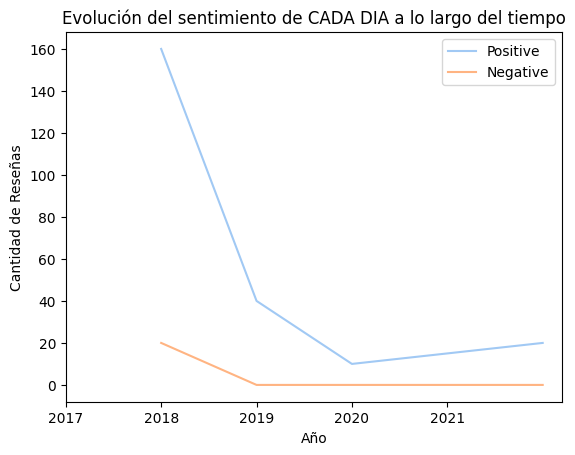

In [121]:
import matplotlib.pyplot as plt
import pandas as pd

# Unir las columnas de fecha y análisis de sentimiento en un nuevo DataFrame
df_resenha2 = pd.concat([df_cadaDia['Fecha'], data_cadaDia['Analysis Resenha']], axis=1)

# Asegurarse de que la columna de fecha esté en formato de fecha y ordenar el DataFrame por fecha
df_resenha2['Fecha'] = pd.to_datetime(df_resenha2['Fecha'], format="%d %B %Y")
df_resenha2.sort_values('Fecha', inplace=True)

# Agrupar las reseñas por año y contar la cantidad de reseñas positivas y negativas
resenha_counts2 = df_resenha.groupby(df_resenha2['Fecha'].dt.year)['Analysis Resenha'].value_counts().unstack().fillna(0)

# Crear el gráfico de líneas
plt.plot(resenha_counts2.index, resenha_counts2['Positive'], label='Positive')
plt.plot(resenha_counts2.index, resenha_counts2['Negative'], label='Negative')

# Agregar título y etiquetas de los ejes
plt.title('Evolución del sentimiento de CADA DIA a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reseñas')
plt.legend()

# Mostrar solo los años enteros en el eje x
plt.xticks(resenha_counts.index.astype(int))

# Mostrar el gráfico
plt.show()

# 5. Conclusiones

> Hice un analisis de dos peliculas diferentes, una llamada "Coco" y la otra "Cada dia". Decidí analizar las reseñas y tambien el titulo de cada reseña de ambas películas, para poder ver que tanto podría variar el analisis de sentimiento. Decidí hacer de esta manera, ya que la mayoría de las veces solemos mirar solo los titulos y eso podría ser engañoso. Para poder verificar y comparar los resultados del analisis de sentimiento, utilicé textblob y vader.

> Al analizar la pelicula "Coco", pude ver que con textblob, la reseña era casi toda positiva, con solo un 8% de reseñas negativas, mientras que con el analisis de Vader se puede ver un porcentaje de reseñas negativas mas grande, de un 12%. En el analisis de sentimiento del titulo tambien se puede ver algunas diferencias. Con textblob, se analizó que mas de la mitad de los titulos de las reseñas son positivas (60%), 8% son negativas y luego el resto son neutros, es decir no lo pudo clasificar ni en positivo o negativo. Con el analisis de sentimiento de vader se ve que identificó que el 40% de los titulos de las reseñas son positivos, pero el resto los puso como neutros. Esto tiene sentido ya que normalmente los titulos no nos dan toda la información, sino que son mas para atrapar al lector.

> Luego al analizar la pelicula "Cada día", se ve que con textblob, la mayoria de las reseñas son positivas y solo 4% son negativas. Al compararlo con vader, se ve que con vader hay menos reseñas positivas y hay 8% de reseñas neutras. Esto quiere decir que las reseñas no daban la información suficiente para definirlas como positivas o negativas. El analisis realizado a los titulos de las reseñas tambien es bastante diferente, con textblob, la mitad son positivas, 24% negativas y el resto neutro. Utilizando vader se analizo que el 32% son positivas, solo el 8% son negativas y el resto de los titulos no lo pudo definir y los dejo como neutro.

> Con esta comparación se puede ver que varía mucho el analisis de sentimiento al hacer de la reseña y al hacer del titulo de la misma. Un gran porcentaje de los titulos son neutros ya que no proporcionan información suficiente. Pero luego al analizar las reseñas en sí, se ve que en ambas peliculas hay muchas mas reseñas positivas que negativas y neutras, ya que ambas son peliculas bastate alegres y con un mensaje importante.

> Se podría decir que vader hace un analisis mas profundo para saber si la reseña es positiva o no, ya que con textblob hay mayor cantidad de reseñas positivas, mientras que haciendo con vader, este tiene mas en negativos y neutrales, en comparacion con textblob.

> Por último tenemos la evolución del sentimiento de ambas peliculas. "Coco" fue lanzada a finales del 2017 y se ve que en el 2018 tuvo su pico de reseñas positivas y luego tuvo cada vez menos. En 2020, hubo mas reseñas negativas que positivas, lo cual es llamativo. A lo mejor la pandemia y la situación ese año tuvo un efecto de como las personas interpretaban la película.

> "Cada día" fue lanzada en 2018 y ese año tuvo muchisimas reseñas positivas y luego fue disminuyendo la cantidad de reseñas. Esta pelicula siempre tuvo pocas reseñas negativas y nunca estas le superaron a las reseñas positivas.


